In [28]:
import pandas as pd
        
df = pd.read_csv('Spettro-pettine-1-adjusted.CSV', sep=';')
df['Counts'] = df['Counts'].replace(0, 1)
df

,Channel,Counts
0,181,2
1,183,1
2,185,3
3,187,1
4,189,2
...,...,...
1155,2491,59
1156,2493,30
1157,2495,44
1158,2497,51


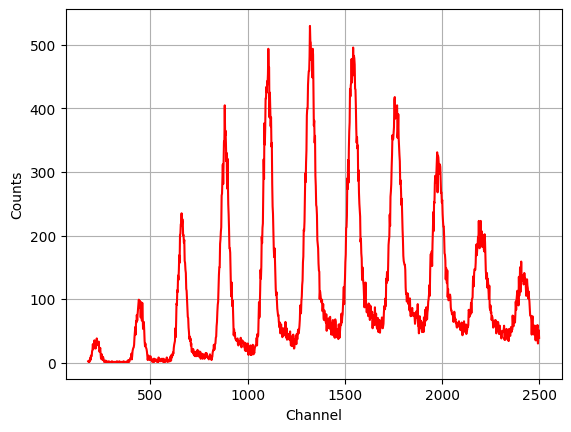

In [29]:
import matplotlib.pyplot as plt
import numpy as np

#plot the histogram
fig, ax = plt.subplots()
ax.plot(df['Channel'], df['Counts'], 'r-')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [30]:
yerr = np.sqrt(df['Counts'])

for i in yerr:
    if i == 0:
        i = 1

In [31]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, poisson

def func(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3, mu4, sigma4, A4, mu5, sigma5, A5, mu6, sigma6, A6, mu7, sigma7, A7, mu8, sigma8, A8, mu9, sigma9, A9, mufirst, sigmafirst, Afirst, musecond, sigmasecond, Asecond, B, muB, sigmaB):
    return A1 * norm.pdf(x, mu1, sigma1) + A2 * norm.pdf(x, mu2, sigma2) + A3 * norm.pdf(x, mu3, sigma3) + A4 * norm.pdf(x, mu4, sigma4) + A5 * norm.pdf(x, mu5, sigma5) + A6 * norm.pdf(x, mu6, sigma6) + A7 * norm.pdf(x, mu7, sigma7) + A8 * norm.pdf(x, mu8, sigma8) + A9 * norm.pdf(x, mu9, sigma9) + B * norm.pdf(x, muB, sigmaB) + Afirst * norm.pdf(x, mufirst, sigmafirst) + Asecond * norm.pdf(x, musecond, sigmasecond)

ls = LeastSquares(df['Channel'], df['Counts'], yerr, func)
m = Minuit(ls, mu1=667, sigma1=20, A1=222, mu2=883, sigma2=20, A2=400, mu3=1109, sigma3=20, A3=500, mu4=1333, sigma4=20, A4=520, mu5=1540, sigma5=20, A5=500, mu6=1770, sigma6=20, A6=400, mu7=1970, sigma7=20, A7=350, mu8=2200, sigma8=20, A8=225, mu9=2420, sigma9=20, A9=160,  mufirst=220, sigmafirst=20, Afirst=40, musecond=450, sigmasecond=20, Asecond=100, muB=1850, sigmaB=1000, B=80)
m.values['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'Afirst', 'Asecond', 'B'] = 0
m.fixed['mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
ls.mask = (df['Channel'] > 600) & (df['Channel'] < 730)
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 830) & (df['Channel'] < 950)
m.values['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'Afirst', 'Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 1050) & (df['Channel'] < 1170)
m.values['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'Afirst', 'Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 1250) & (df['Channel'] < 1400)
m.values['A5', 'A6', 'A7', 'A8', 'A9', 'Afirst', 'Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 1470) & (df['Channel'] < 1650)
m.values['A6', 'A7', 'A8', 'A9', 'Afirst', 'Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 1670) & (df['Channel'] < 1870)
m.values['A7', 'A8', 'A9', 'Afirst', 'Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 1870) & (df['Channel'] < 2080)
m.values['A8', 'A9', 'Afirst', 'Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 2100) & (df['Channel'] < 2280)
m.values['A9', 'Afirst', 'Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 2300) & (df['Channel'] < 2500)
m.values['Afirst', 'Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 190) & (df['Channel'] < 255)
m.values['Asecond', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'musecond', 'sigmasecond', 'Asecond', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 400) & (df['Channel'] < 490)
m.values['B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 600) & (df['Channel'] < 2500)
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'mufirst', 'sigmafirst', 'Afirst', 'musecond', 'sigmasecond', 'Asecond'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
m.migrad()
m.hesse()


display(m)
print(m.values)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1820 (χ²/ndof = 1.6)       │             Nfcn = 3540              │
│ EDM = 3.38e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name        │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu1         │  664.26   │   0.30    │            │            │         │         │       │
│ 1 │ sigma1      │   19.54   │   0.24    │            │            │         │         │       │
│ 2 │ A1          │  10.42e3  │  0.15e3   │            │            │         │         │       │
│ 3 │ mu2         │  884.44   │   0.26    │            │            │         │         │       │
│ 4 │ sigma2      │   21.58   │   0.22    │            │            │         │         │       │
│ 5 │ A2          │  17.87e3  │  0.20e3   │            │            │         │         │       │
│ 6 │ mu3         │ 1.10561e3 │ 0.00024e3 │            │            │         │         │       │
│ 7 │ sigma3      │   22.55   │   0.21    │            │            │         │         │       │
│ 8 │ A3          │  24.09e3  │  0.24e3   │            │            │         │         │       │
│ 9 │ mu4         │ 1.32494e3 │ 0.00025e3 │            │            │         │         │       │
│ 10│ sigma4      │   23.96   │   0.23    │            │            │         │         │       │
│ 11│ A4          │  27.21e3  │  0.27e3   │            │            │         │         │       │
│ 12│ mu5         │ 1.54438e3 │ 0.00029e3 │            │            │         │         │       │
│ 13│ sigma5      │   24.65   │   0.26    │            │            │         │         │       │
│ 14│ A5          │  25.64e3  │  0.28e3   │            │            │         │         │       │
│ 15│ mu6         │ 1.76369e3 │ 0.00034e3 │            │            │         │         │       │
│ 16│ sigma6      │   25.36   │   0.31    │            │            │         │         │       │
│ 17│ A6          │  21.37e3  │  0.27e3   │            │            │         │         │       │
│ 18│ mu7         │ 1.9819e3  │ 0.0004e3  │            │            │         │         │       │
│ 19│ sigma7      │   26.2    │    0.4    │            │            │         │         │       │
│ 20│ A7          │  16.29e3  │  0.25e3   │            │            │         │         │       │
│ 21│ mu8         │ 2.1999e3  │ 0.0006e3  │            │            │         │         │       │
│ 22│ sigma8      │   29.0    │    0.6    │            │            │         │         │       │
│ 23│ A8          │  11.32e3  │  0.25e3   │            │            │         │         │       │
│ 24│ mu9         │ 2.4177e3  │ 0.0008e3  │            │            │         │         │       │
│ 25│ sigma9      │   31.0    │    0.9    │            │            │         │         │       │
│ 26│ A9          │  7.83e3   │  0.24e3   │            │            │         │         │       │
│ 27│ mufirst     │   223.2   │    0.7    │            │            │         │         │       │
│ 28│ sigmafirst  │   16.0    │    0.5    │       

<ValueView mu1=664.2636975634795 sigma1=19.5387400765508 A1=10416.26396922313 mu2=884.4350179361974 sigma2=21.577346269689812 A2=17867.18463782913 mu3=1105.6139853527604 sigma3=22.551550132313004 A3=24093.143232712056 mu4=1324.9447239693664 sigma4=23.96401491011423 A4=27210.182140789435 mu5=1544.3797379141517 sigma5=24.65109950348191 A5=25641.6080666368 mu6=1763.6913753062859 sigma6=25.364624000157832 A6=21372.074972314917 mu7=1981.8996389995582 sigma7=26.179035067042914 A7=16288.553180604667 mu8=2199.889577752661 sigma8=28.98154700187741 A8=11318.908474950444 mu9=2417.6602919986103 sigma9=31.040316819234523 A9=7830.685298877833 mufirst=223.16860570282498 sigmafirst=15.97604932428041 Afirst=1277.0817159995527 musecond=445.51688474152127 sigmasecond=18.414207318059066 Asecond=4265.170713221299 B=88303.90223488309 muB=1810.7313628168438 sigmaB=510.8329033833183>


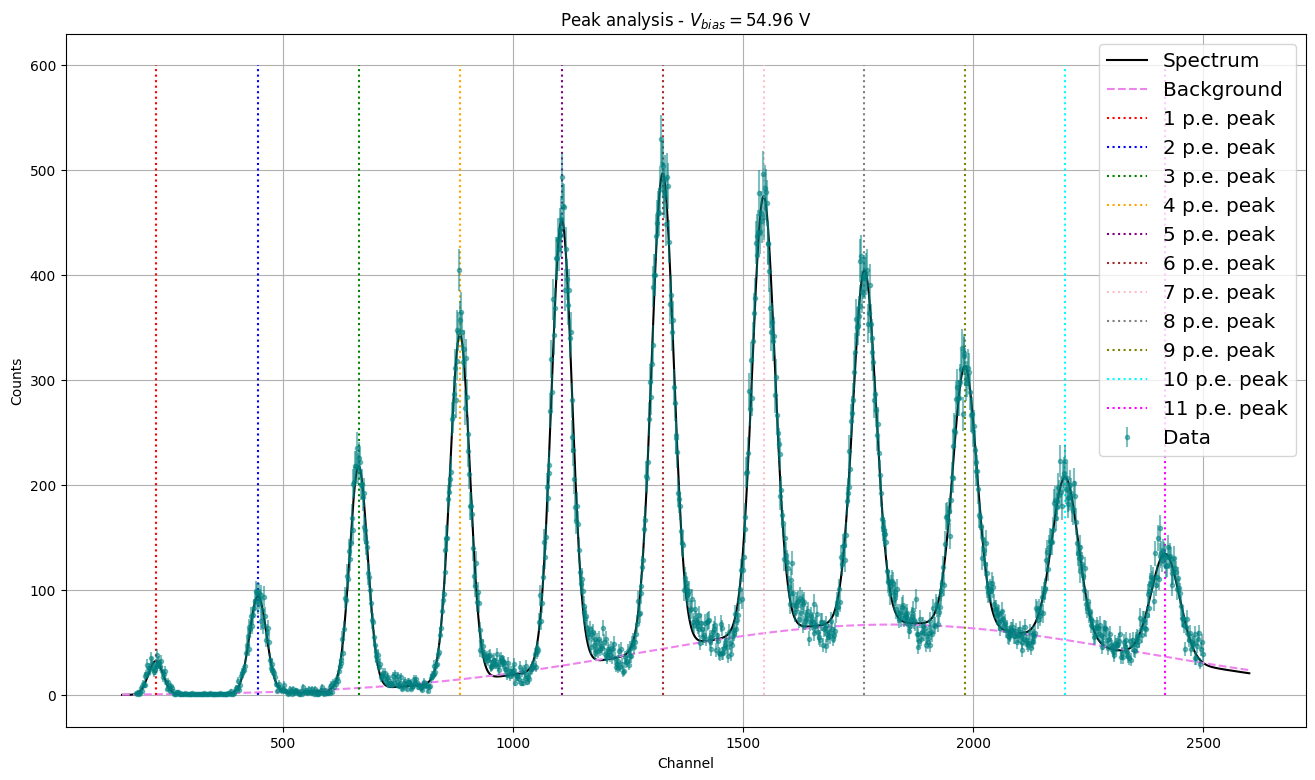

In [32]:
#plotta la funzione
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
x = np.linspace(150, 2600, 10000)
y = func(x, *m.values)
ax.plot(x, y, color='black', linestyle='-', alpha=1, label='Spectrum')
ax.plot(x, norm.pdf(x, 1820.9900541518662, 541.2363961410111)*91300.19932268825, color='violet', linestyle='--', alpha=1, label='Background')
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
mu_values = [m.values['mufirst'], m.values['musecond'], m.values['mu1'], m.values['mu2'], m.values['mu3'], m.values['mu4'], m.values['mu5'], m.values['mu6'], m.values['mu7'], m.values['mu8'], m.values['mu9']]
peak_labels = [f'{i+1} p.e. peak' for i in range(len(mu_values))]

for i, mu in enumerate(mu_values):
    ax.vlines(mu, 0, 600, color=colors[i % len(colors)], linestyle=':', alpha=1, label=peak_labels[i])

ax.errorbar(df['Channel'], df['Counts'], yerr, fmt='.', color='teal', alpha=0.5, label='Data')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.set_title('Peak analysis - $V_{bias} = 54.96$ V')
ax.grid()
#ax.legend()
ax.legend(fontsize='x-large')
plt.savefig('high_resolution_plot.png', dpi=300)
plt.show()

In [40]:
list_deltachannel = np.array([m.values['musecond']-m.values['mufirst'], m.values['mu1']-m.values['musecond'], m.values['mu2']-m.values['mu1'], m.values['mu3']-m.values['mu2'], m.values['mu4']-m.values['mu3'], m.values['mu5']-m.values['mu4'], m.values['mu6']-m.values['mu5'], m.values['mu7']-m.values['mu6'], m.values['mu8']-m.values['mu7'], m.values['mu9']-m.values['mu8']])

correction_factor = (2*(4*10**(-9)))/(50*(2**12)*32)

gain = np.mean(list_deltachannel)*correction_factor/(1.602*10**(-19))
gain_err = np.std(list_deltachannel)/np.sqrt(len(list_deltachannel))*correction_factor/(1.602*10**(-19))

print('gain =', gain, '+/-', gain_err)
print('convADC =', np.mean(list_deltachannel), '+/-', np.std(list_deltachannel)/np.sqrt(len(list_deltachannel)))

gain = 1672174.0 +/- 3315.4219
convADC = 219.44917 +/- 0.43510216


In [34]:
from jax import grad, jacfwd
import jax.numpy as np

def error_prop_jax_gen(q,x,dx):
    jac = jacfwd(q)
    return np.sqrt(np.sum(np.power(jac(x)*dx,2)))

def resolution_function(x):
    return (x[2]-x[0])/np.sqrt(x[3]**2-x[1]**2)

x_=np.array([m.values['mu1'], m.values['sigma1'], m.values['mu2'], m.values['sigma2']])
dx_=np.array([m.errors['mu1'], m.errors['sigma1'], m.errors['mu2'], m.errors['sigma2']])

print('resolution =', resolution_function(x_), '+/-', error_prop_jax_gen(resolution_function, x_, dx_))

resolution = 24.048506 +/- 1.9092567
